In [236]:
import os
import math
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from scipy import fftpack
import scipy.sparse
from scipy.sparse import csr_matrix

# Imaginary time evolution ground state

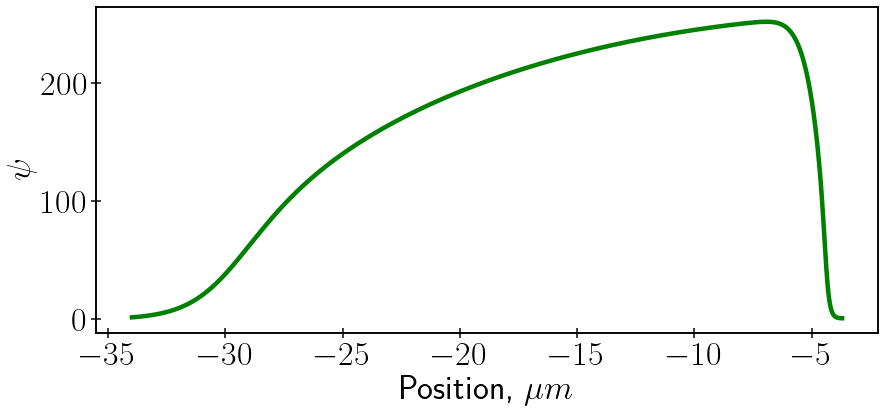

In [237]:
os.chdir("/Users/sasankadowarah/atomtronics/GP-equation-main")
ground_state_position,initial_ground_state_wavefunction= np.loadtxt("ground_state_wavefunction_source_well_8_50000.txt",
                                                                    delimiter = '\t', unpack=True)
large = 40; med = 34; small = 20
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med ,
          'axes.titlesize': med ,
          'xtick.labelsize': med ,
          'ytick.labelsize': med ,
          'figure.titlesize': med}
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
plt.rcParams.update(params)
f = plt.figure()
ax = f.gca()
plt.xlabel("Position, "+r"$\mu m $",fontweight='bold')  # Set X-axis label
plt.ylabel(r"$\psi$")
plt.plot(ground_state_position/(1.e-6),initial_ground_state_wavefunction,linewidth = 4.5,color="green")
f.set_figwidth(14)
f.set_figheight(6)
for spine in ax.spines.values():
    spine.set_linewidth(1.9)
    ax = f.gca()
ax.tick_params(axis="x", direction="inout", length=10, width=1.5, color="k")
ax.tick_params(axis="y", direction="inout", length=10, width=1.5, color="k")
plt.show()

# Transistor potential

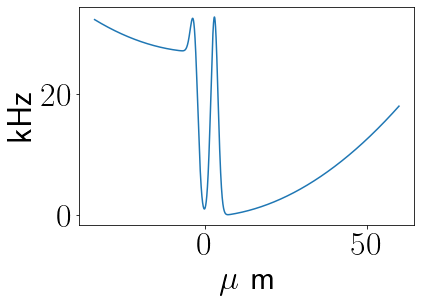

In [238]:
position_landscape,potential_landscape= np.loadtxt("potential_landscape_original.txt", delimiter = '\t', unpack=True)
def extract_source_gate_drain_well_potential(position,potential):
    
    # Position where the gate well starts.
    gate_well_start_index = -34
    # Position where the gate well ends.
    gate_well_end_index   = 60#2.98
    # Extracts the gate well position.
    well_position = position[np.where((position > gate_well_start_index) & (position < gate_well_end_index))]
    # Extract the corresponding potential values for the gate well.
    well_potential = potential[np.where(position == well_position[0])[0][0]:np.where(position == well_position[-1])[0][0]+1]
    
    return [well_position,well_potential]

source_gate_drain_well_position  = extract_source_gate_drain_well_potential(position_landscape,potential_landscape)[0]
source_gate_drain_well_potential = extract_source_gate_drain_well_potential(position_landscape,potential_landscape)[1]
plt.plot(source_gate_drain_well_position,source_gate_drain_well_potential)
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"kHz")
plt.show()

# Reducing density of points

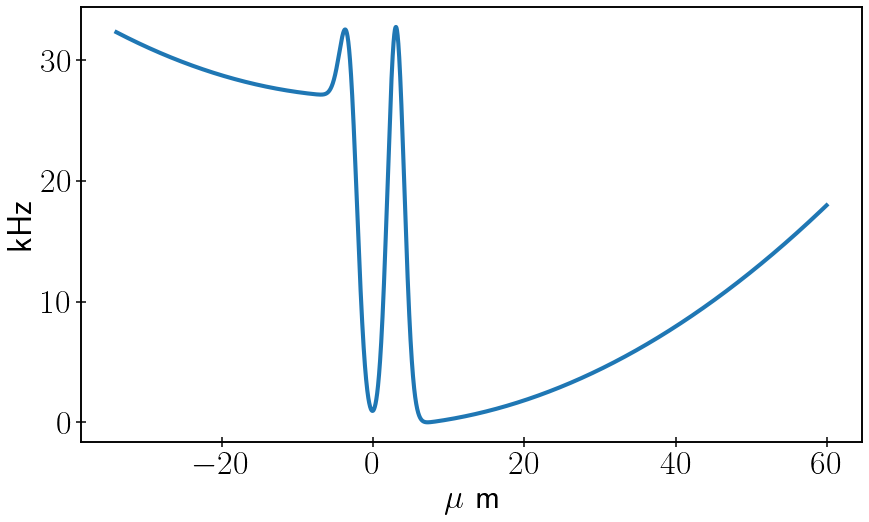

In [239]:
def reduce_density_points(array):
    new_array = []

  # Iterate over the array, skipping the first and last elements.
    for i in range(1, len(array),2):
    # Calculate the sum of the two nearest neighbours.
        sum_of_neighbours = array[i]

    # Set the corresponding entry in the new array to the sum of the neighbours.
        new_array.append(sum_of_neighbours)

  # Return the new array.
    return new_array

reduced_density_positions = reduce_density_points(source_gate_drain_well_position)
for i in range(3):
    reduced_density_positions = reduce_density_points(reduced_density_positions)

reduced_density_potentials = reduce_density_points(source_gate_drain_well_potential)
for i in range(3):
    reduced_density_potentials = reduce_density_points(reduced_density_potentials)


f = plt.figure()
ax = f.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.9)
ax.tick_params(axis="x", direction="inout", length=10, width=1.5, color="k")
ax.tick_params(axis="y", direction="inout", length=10, width=1.5, color="k")
plt.plot(reduced_density_positions, reduced_density_potentials,linewidth=4.1)
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"kHz")
f.set_figwidth(14)
f.set_figheight(8)
plt.show()    

In [240]:
source_gate_drain_well_position = np.array(reduced_density_positions)
source_gate_drain_well_potential = np.array(reduced_density_potentials)

# Source well potential

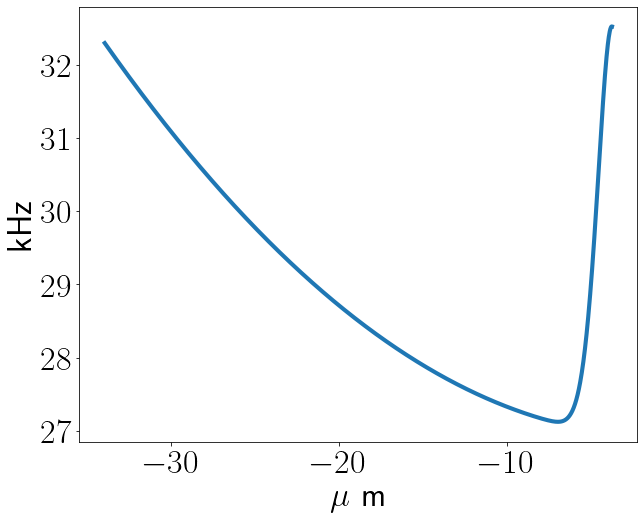

In [241]:
def extract_source_well_potential(position,potential):
    
    # Position where the gate well starts.
    gate_well_start_index = -34
    # Position where the gate well ends.
    gate_well_end_index   = -3.7
    # Extracts the gate well position.
    well_position = position[np.where((position > gate_well_start_index) & (position < gate_well_end_index))]
    # Extract the corresponding potential values for the gate well.
    well_potential = potential[np.where(position == well_position[0])[0][0]:np.where(position == well_position[-1])[0][0]+1]
    
    return [well_position,well_potential]

source_well_position  = extract_source_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[0]
source_well_potential = extract_source_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[1]
f = plt.figure()
plt.plot(source_well_position,source_well_potential,linewidth=4.1)
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"kHz")
f.set_figwidth(10)
f.set_figheight(8)
#plt.savefig('source_well.png', dpi=300)
plt.show()

In [242]:
source_well_length

1578

# Gate well potential

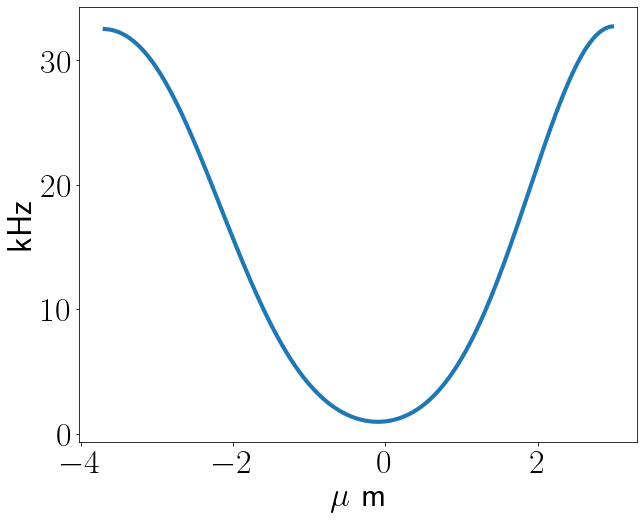

In [243]:
def extract_gate_well_potential(position,potential):
    
    # Position where the gate well starts.
    gate_well_start_index = -3.7
    # Position where the gate well ends.
    gate_well_end_index   = 2.98
    # Extracts the gate well position.
    well_position = position[np.where((position > gate_well_start_index) & (position < gate_well_end_index))]
    # Extract the corresponding potential values for the gate well.
    well_potential = potential[np.where(position == well_position[0])[0][0]:np.where(position == well_position[-1])[0][0]+1]
    
    return [well_position,well_potential]

#gate_well_position  = extract_gate_well_potential(position_landscape,potential_landscape)[0]
#gate_well_potential = extract_gate_well_potential(position_landscape,potential_landscape)[1]
gate_well_position  = extract_gate_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[0]
gate_well_potential = extract_gate_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[1]
f = plt.figure()
plt.plot(gate_well_position,gate_well_potential,linewidth=4.1)
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"kHz")
f.set_figwidth(10)
f.set_figheight(8)
#plt.savefig('source_well.png', dpi=300)
plt.show()

In [244]:
gate_well_length

348

# Drain well potential

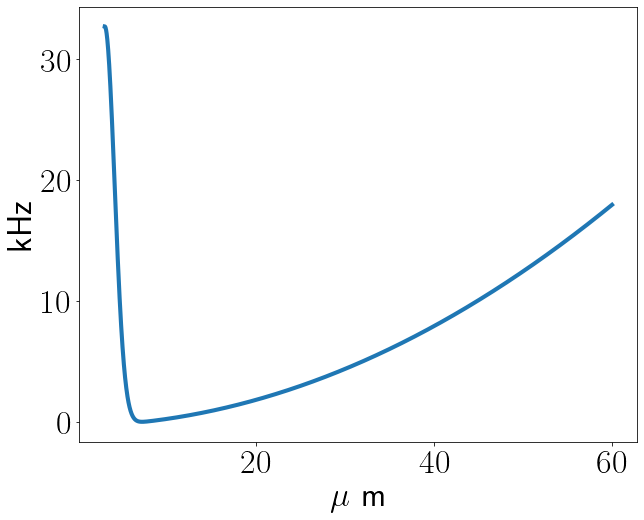

In [245]:
def extract_drain_well_potential(position,potential):
    
    # Position where the gate well starts.
    drain_well_start_index = 2.98
    # Position where the gate well ends.
    drain_well_end_index   = 60
    # Extracts the gate well position.
    well_position = position[np.where((position > drain_well_start_index) & (position < drain_well_end_index))]
    # Extract the corresponding potential values for the gate well.
    well_potential = potential[np.where(position == well_position[0])[0][0]:np.where(position == well_position[-1])[0][0]+1]
    
    return [well_position,well_potential]

#drain_well_position  = extract_drain_well_potential(position_landscape,potential_landscape)[0]
#drain_well_potential = extract_drain_well_potential(position_landscape,potential_landscape)[1]
drain_well_position  = extract_drain_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[0]
drain_well_potential = extract_drain_well_potential(source_gate_drain_well_position,source_gate_drain_well_potential)[1]
f = plt.figure()
plt.plot(drain_well_position,drain_well_potential,linewidth=4.1)
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"kHz")
f.set_figwidth(10)
f.set_figheight(8)
#plt.savefig('source_well.png', dpi=300)
plt.show()

# Transistor code parameters

In [246]:
"""
The potential is in kHz units. It is converted to SI units
by multiplying 10^3 * h.
"""
PI = np.pi
H_BAR = 6.626*10**(-34)/(2*PI)
r""" Rb87 parameters """
# Mass of Rb87 atom.
M   = 1.4192261*10**(-25) # kg
# s wave scattering length of Rb87 atom.
a_s = 98.006*5.29*10**(-11) # m https://journals.aps.org/pra/abstract/10.1103/PhysRevA.87.053614

# trapping frequency in the source well.
source_trap_frequency = 918
trap_length = np.sqrt(H_BAR/(M*source_trap_frequency)) # m
# Number of atoms in the source well.
N_atom = 20000
A = PI*trap_length**2
g_source   = (4*PI*H_BAR**2*a_s)/(A*M)

# trapping frequency in the gate well.
gate_trap_frequency = 5653
trap_length = np.sqrt(H_BAR/(M*gate_trap_frequency)) # m
A = PI*trap_length**2
g_gate   = (4*PI*H_BAR**2*a_s)/(A*M)

# trapping frequency in the drain well.
drain_trap_frequency = 1113
trap_length = np.sqrt(H_BAR/(M*drain_trap_frequency)) # m
A = PI*trap_length**2
g_drain   = (4*PI*H_BAR**2*a_s)/(A*M)

external_potential = source_gate_drain_well_potential*(10**3)*2*PI*(H_BAR) # J
xs = source_gate_drain_well_position*10**(-6) # m

# Length of the space interval.
L  = len(xs)
# Increment in the space interval.
dx = np.abs(xs[1]-xs[0])
# Increment in momentum space interval.
dk = (2*PI)/L


N  = len(external_potential)

source_gate_drain_well_length = len(reduced_density_positions)
source_well_length = len(ground_state_position)
gate_well_length = len(gate_well_position)
drain_well_length = len(drain_well_position)
g_source_well = g_source*np.ones(source_well_length)
g_gate_well = g_gate*np.ones(source_gate_drain_well_length-source_well_length-drain_well_length)
g_drain_well = g_drain*np.ones(source_gate_drain_well_length-source_well_length-gate_well_length)
g_source_gate_drain_well = np.hstack([g_source_well,g_gate_well,g_drain_well])

def normalize_x(wavefunction_x):
    return wavefunction_x/(np.sqrt(np.sum(np.abs(wavefunction_x)**2)*dx))

while len(initial_ground_state_wavefunction) < N:
    initial_ground_state_wavefunction=np.hstack((initial_ground_state_wavefunction,np.array([0])))

# Time evolution code

In [247]:
# Laplace Operator (Finite Difference)
D2 = scipy.sparse.diags([1, -2, 1], 
                        [-1, 0, 1],
                        shape=(xs.size, xs.size)) / dx**2
H = - (H_BAR/(2*M)) * D2
if external_potential is not None:
    H += scipy.sparse.spdiags(external_potential,0,N,N)

In [248]:
def dpsi_dt(t,psi):
    dpsi_dt = -1j * (H.dot(psi) + (g_source_gate_drain_well /H_BAR)*N_atom*(np.abs(psi)**2)*(psi))
    return dpsi_dt

In [249]:
t0 = 0.0
dt = 10**(-7)
def wavefunction_t(total_time):
    psi_0 = np.complex64(initial_ground_state_wavefunction)
    psi_0 = normalize_x(psi_0)
    psi_t = psi_0
    t = t0
    number_of_iterations = int(total_time/dt)
    for i in range(number_of_iterations):    
        k1 = dt * dpsi_dt(t, psi_t)
        k2 = dt * dpsi_dt(t + dt/2, psi_t + k1/2)
        k3 = dt * dpsi_dt(t + dt/2, psi_t + k2/2)
        k4 = dt * dpsi_dt(t + dt, psi_t + k3)

        psi_t = psi_t + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t = t + dt
    return psi_t

In [250]:
time_t = 13
time_evolved_wavefunction = wavefunction_t(time_t*10**(-3))

In [251]:
def number_of_atom(wavefunction,a,b):
    return N_atom*np.sum(np.abs(wavefunction[a:b])**2)*dx

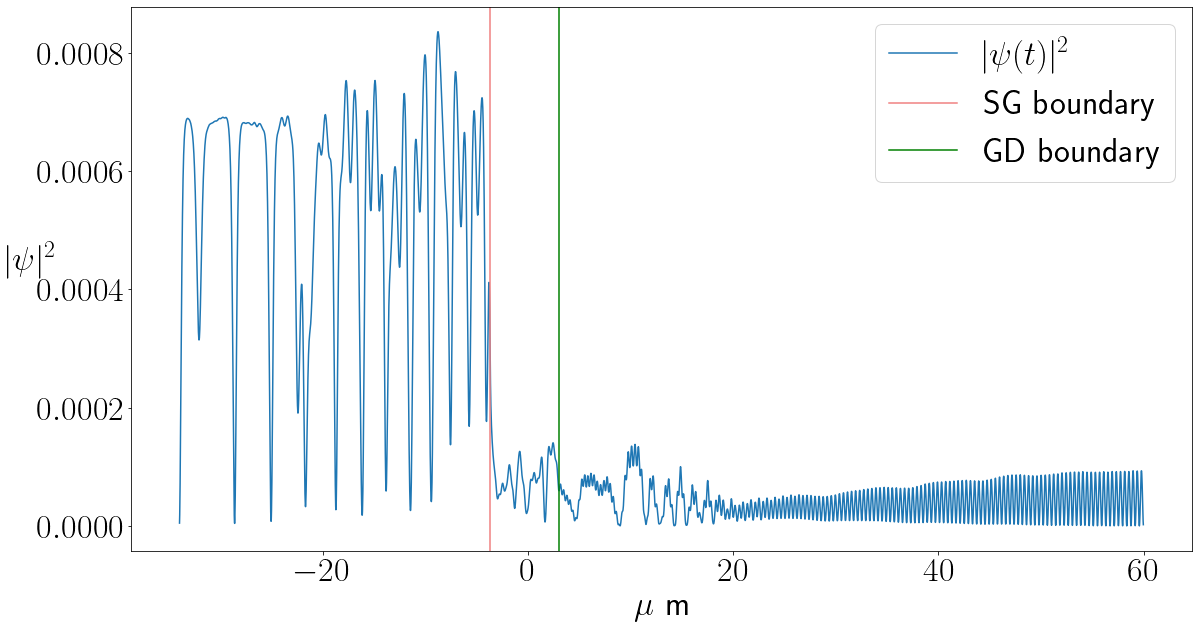

In [252]:
f = plt.figure()
#plt.scatter(xs/(1.e-6),np.abs(time_evolved_wavefunction)**2*dx,label=r"$|\psi(t)|^{2}$",
#            c=np.abs(time_evolved_wavefunction)**2*dx, cmap="brg")
plt.plot(xs/(1.e-6),np.abs(time_evolved_wavefunction)**2*dx,label=r"$|\psi(t)|^{2}$")
#plt.colorbar(label=r"$|\psi|^{2}$", orientation="vertical")
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"$|\psi|^{2}$",rotation=0)
ax = f.gca()
ax.axvline(-3.7, color="lightcoral",label = r"SG boundary")
plt.legend()
ax.axvline(2.98, color="green",label = r"GD boundary")
plt.legend()
f.set_figwidth(19)
f.set_figheight(10)
import os
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("probability_"+str(time_t)+"ms.jpg", dpi=300)
plt.show()

# Wave at the drain well

In [253]:
source_gate_boundary = source_well_length+gate_well_length
xs[source_gate_boundary]

2.9976e-06

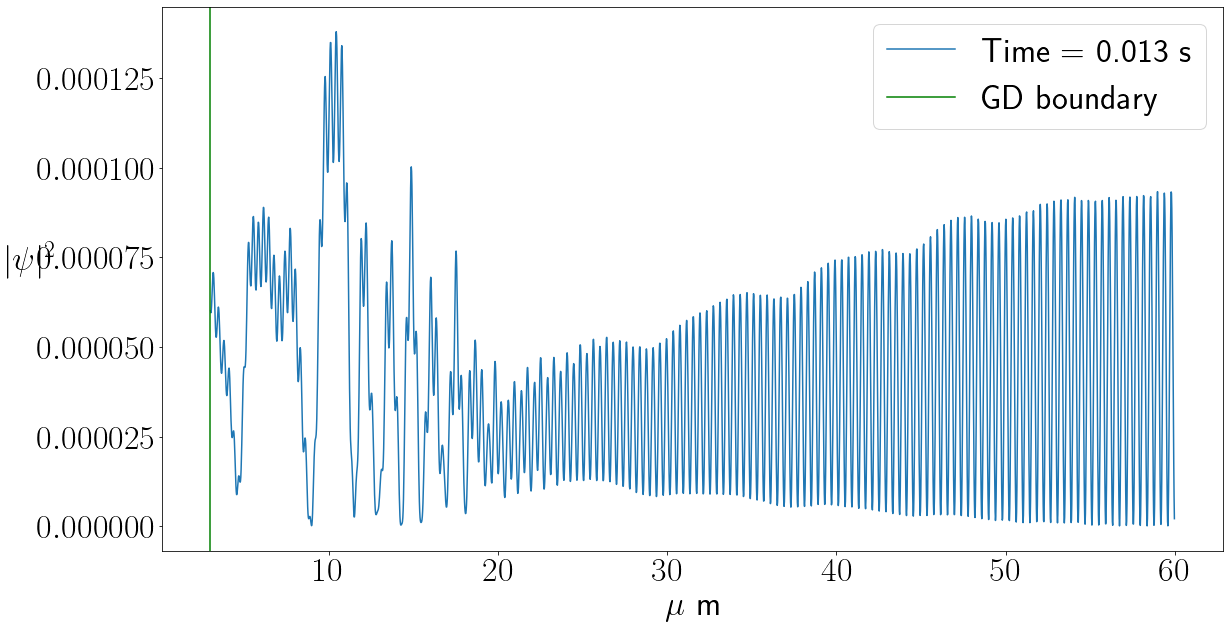

In [254]:
f = plt.figure()
#plt.scatter(xs/(1.e-6),np.abs(time_evolved_wavefunction)**2*dx,label=r"$|\psi(t)|^{2}$",
#            c=np.abs(time_evolved_wavefunction)**2*dx, cmap="brg")
plt.plot(xs[source_well_length+gate_well_length:]/(1.e-6),np.abs(time_evolved_wavefunction[source_well_length+gate_well_length:])**2*dx,
         label=r"Time = "+str(np.around(time_t*10**(-3),3)) + " s",)
#plt.colorbar(label=r"$|\psi|^{2}$", orientation="vertical")
plt.xlabel(r"$\mu$ m")
plt.ylabel(r"$|\psi|^{2}$",rotation=0)
ax = f.gca()
#ax.axvline(-3.7, color="lightcoral",label = r"SG boundary")
#plt.legend()
ax.axvline(2.98, color="green",label = r"GD boundary")
plt.legend()
f.set_figwidth(19)
f.set_figheight(10)
import os
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("drain_well_wavefunction_x_"+str(time_t)+"ms.jpg", dpi=600)
plt.show()

# Analysis for the coherence in the drain well

In [255]:
drain_well_position = xs[source_well_length+gate_well_length:]/(1.e-6);
drain_well_wavefunction = time_evolved_wavefunction[source_well_length+gate_well_length:];

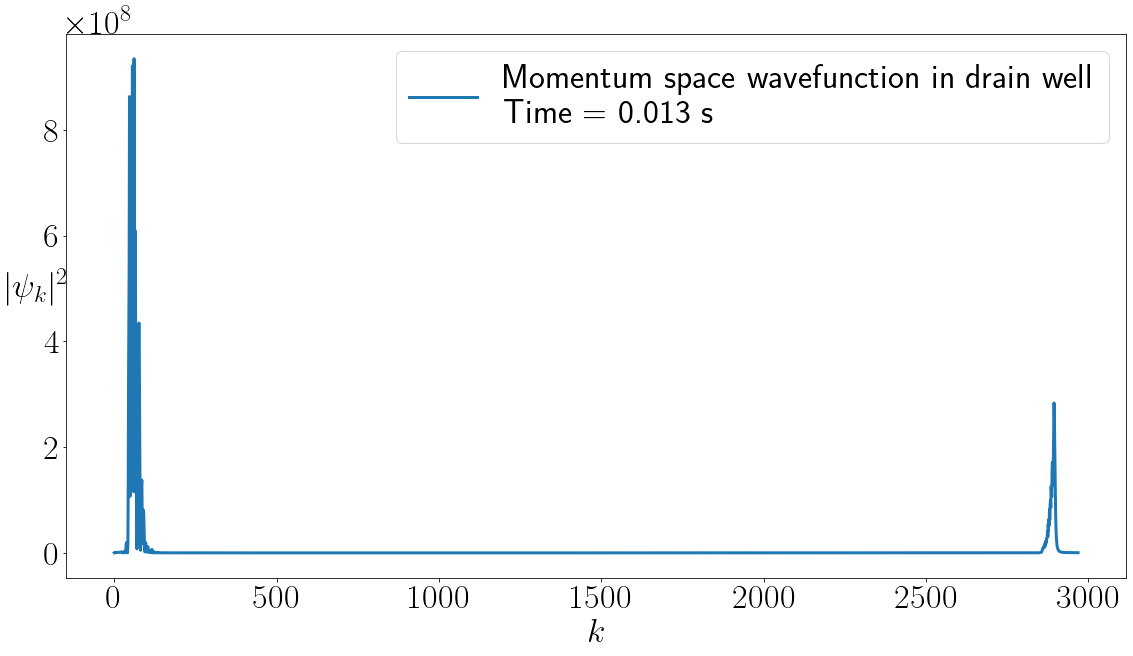

In [256]:
drain_well_wavefunction_k = fftpack.fft(drain_well_wavefunction)
f = plt.figure()
plt.xlabel(r"$k$")
plt.ylabel(r"$|\psi_{k}|^{2}$",rotation=0)
ax = f.gca()
#ax.axvline(-3.7, color="lightcoral",label = r"SG boundary")
#plt.legend()
#ax.axvline(2.98, color="green",label = r"GD boundary")
f.set_figwidth(19)
f.set_figheight(10)
plt.plot(np.abs(drain_well_wavefunction_k)**2,linewidth = 3,label="Momentum space wavefunction in drain well"
         +"\n"+r"Time = "+str(np.around(time_t*10**(-3),3)) + " s")
plt.legend()
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("drain_well_wavefunction_k_"+str(time_t)+"ms.jpg", dpi=600)
plt.show()

In [ ]:
gate_atom_number = []
source_atom_number = []
drain_atom_number = []
time_lst = [t0,10*10**(-3),15*10**(-3),20*10**(-3),22.5*10**(-3),25*10**(-3),27.5*10**(-3),30*10**(-3)]
for time in time_lst:
    wavefunction_time_t = wavefunction_t(time)
    gate_atom_number.append(number_of_atom(wavefunction_time_t,source_well_length,source_well_length+gate_well_length))
    source_atom_number.append(number_of_atom(wavefunction_time_t,0,source_well_length))
    drain_atom_number.append(number_of_atom(wavefunction_time_t,source_well_length+gate_well_length
                                            ,source_well_length+gate_well_length+drain_well_length))

In [ ]:
time_lst = np.array(time_lst)

In [ ]:
f = plt.figure()
plt.plot(time_lst/(10**(-3)),source_atom_number,label = r"$N_{\rm source}$",linewidth = 3,color = "red")
plt.plot(time_lst/(10**(-3)),gate_atom_number,label = r"$N_{\rm gate}$",linewidth = 3,color = "green")
plt.plot(time_lst/(10**(-3)),drain_atom_number,label = r"$N_{\rm drain}$",linewidth = 3,color = "blue")

plt.xlabel(r"Miliseconds, $ms$")
plt.ylabel(r"Number of atoms")
plt.legend()
f.set_figwidth(12)
f.set_figheight(8)
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("number_of_atoms.png", dpi=300)
plt.show()

In [ ]:
f = plt.figure()
plt.plot(time_lst/(10**(-3)),source_atom_number,label = r"$N_{\rm source}$",linewidth = 3,color = "red")
plt.xlabel(r"Miliseconds, $ms$")
plt.ylabel(r"Number of atoms")
plt.legend()
plt.scatter(time_lst/(10**(-3)),source_atom_number,label = "",s = 210,color = "red")
f.set_figwidth(12)
f.set_figheight(8)
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("N_source.png", dpi=300)
plt.show()

In [ ]:
f = plt.figure()
plt.plot(time_lst/(10**(-3)),gate_atom_number,label = r"$N_{\rm gate}$",linewidth = 3,color = "green")
plt.xlabel(r"Miliseconds, $ms$")
plt.ylabel(r"Number of atoms")
plt.legend()
plt.scatter(time_lst/(10**(-3)),gate_atom_number,label = "",s = 210,color = "green")
f.set_figwidth(12)
f.set_figheight(8)
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("N_gate.png", dpi=300)
plt.show()

In [ ]:
f = plt.figure()
plt.plot(time_lst/(10**(-3)),drain_atom_number,label = r"$N_{\rm drain}$",linewidth = 3,color = "blue")
plt.xlabel(r"Miliseconds, $ms$")
plt.ylabel(r"Number of atoms")
plt.legend()
plt.scatter(time_lst/(10**(-3)),drain_atom_number,label = "",s = 210,color = "blue")
f.set_figwidth(12)
f.set_figheight(8)
path = "/Users/sasankadowarah/atomtronics/plots"
os.chdir(path)
plt.savefig("N_drain.png", dpi=300)
plt.show()

In [ ]:
plt.plot(np.abs(fftpack.fft(time_evolved_wavefunction[source_well_length:source_well_length+gate_well_length]*dx))**2*dk)
plt.show()